In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
import seaborn as sns

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
# np.random.seed(1)

In [2]:
raw_df = pd.read_csv('data/CCdata.csv')
raw_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010
BALANCE,40.9007,3202.47,2495.15,1666.67,817.714,1809.83,627.261,1823.65,1014.93,152.226
BALANCE_FREQUENCY,0.818182,0.909091,1,0.636364,1,1,1,1,1,0.545455
PURCHASES,95.4,0,773.17,1499,16,1333.28,7091.01,436.2,861.49,1281.6
ONEOFF_PURCHASES,0,0,773.17,1499,16,0,6402.63,0,661.49,1281.6
INSTALLMENTS_PURCHASES,95.4,0,0,0,0,1333.28,688.38,436.2,200,0
CASH_ADVANCE,0,6442.95,0,205.788,0,0,0,0,0,0
PURCHASES_FREQUENCY,0.166667,0,1,0.083333,0.083333,0.666667,1,1,0.333333,0.166667
ONEOFF_PURCHASES_FREQUENCY,0,0,1,0.083333,0.083333,0,1,0,0.083333,0.166667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0,0,0,0,0.583333,1,1,0.25,0


In [3]:
raw_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
df = raw_df.drop('CUST_ID', axis=1)

In [5]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Fill the Minimum Payments columns with 0
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(0)

# Since there is only 1 NaN in Credit Limit, we drop it
df = df.dropna()
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

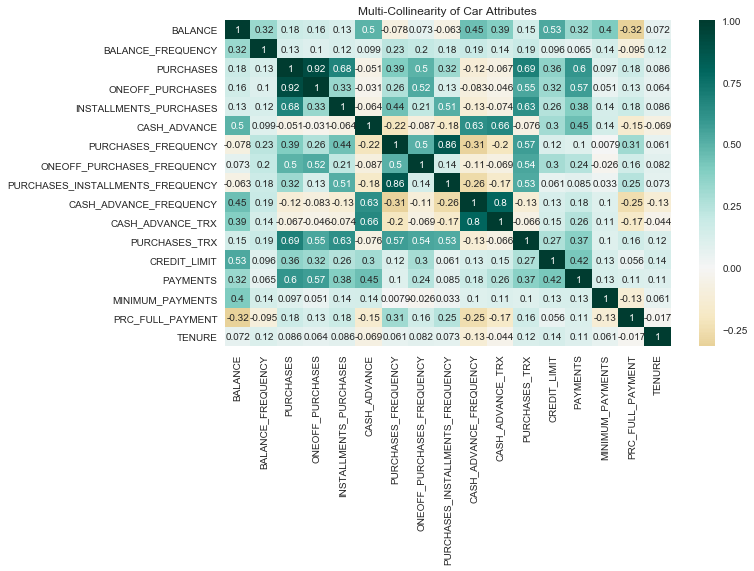

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Car Attributes')

In [9]:
df = df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
              'TENURE', 'PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 
              'CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT'], axis=1)

In [10]:
#Credit Card approval: 1 = approved, 0 = denied
df['CC_APPROVAL'] = df.apply(lambda x: 1
                                 if x['CREDIT_LIMIT']>=3000
                                 and x['BALANCE']>=1000
                                 and x['CASH_ADVANCE']<=100
                                 else 0,
                                 axis=1)

In [11]:
df['P_AMOUNT_PER_TRX'] = df.apply(lambda x: 0 if x['PURCHASES_TRX'] == 0
                                      else x['PURCHASES']/x['PURCHASES_TRX'],
                                      axis=1)

In [12]:
df['CC_APPROVAL'].value_counts()

0    8141
1     808
Name: CC_APPROVAL, dtype: int64

## K-Means Clustering

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
scaled_df=pd.DataFrame(data=scaled_data, columns=df.columns)
scaled_df.head().T

,0,1,2,3,4
BALANCE,-0.732054,0.786858,0.447041,0.049015,-0.358849
PURCHASES,-0.424934,-0.469584,-0.107716,0.231995,-0.462095
CASH_ADVANCE,-0.466805,2.605438,-0.466805,-0.368678,-0.466805
PURCHASES_TRX,-0.511381,-0.591841,-0.109082,-0.551611,-0.551611
CREDIT_LIMIT,-0.960380,0.688601,0.826016,0.826016,-0.905414
MINIMUM_PAYMENTS,-0.297334,0.101998,-0.088524,-0.357057,-0.252265
CC_APPROVAL,-0.315041,-0.315041,3.174192,-0.315041,-0.315041
P_AMOUNT_PER_TRX,-0.163085,-0.460239,-0.058858,8.877985,-0.360565


In [16]:
pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_df)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.454562,-0.339205
1,0.576994,2.553026
2,1.407329,-0.697286
3,1.141101,-1.743714
4,-1.311381,-0.091387


### Graphs to find optimal K for cluster size categorization:
### Elbow & Silhouette

In [17]:
# # Elbow graph to find optimal K for cluster size categorization
# X = df
# distorsions = []

# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k, random_state=10)
#     kmeans.fit(X)
#     distorsions.append(kmeans.inertia_)

# plt.figure(figsize=(5,5))
# plt.xlabel('k')
# plt.plot(range(2, 10), distorsions)
# plt.grid(True)

In [18]:
# # Silhouette coefficient for each k, finding optimal K for cluster size categorization
# X = df
# silhouette_plot = []
# for k in range(2, 10):
#     clusters = KMeans(n_clusters=k, random_state=10)
#     cluster_labels = clusters.fit_predict(X)
#     silhouette_avg = metrics.silhouette_score(X, cluster_labels)
#     silhouette_plot.append(silhouette_avg)
    
# plt.figure(figsize=(10,5))
# plt.subplot(121, title='Silhouette coefficients over k')
# plt.xlabel('k')
# plt.ylabel('silhouette coefficient')
# plt.plot(range(2, 10), silhouette_plot)
# plt.grid(True)

In [19]:
model = KMeans(n_clusters=5, random_state=10).fit(pca_df)
model_label = model.labels_
model_centers = model.cluster_centers_
sorted(model_centers.tolist())

[[-0.8364232605398603, -0.23290633969811894],
 [0.35838942076465685, 1.303920820017168],
 [1.5905655485921106, -1.1296991580819604],
 [2.701380518566881, 3.440609080728144],
 [7.004743721997319, -3.0450963096460733]]

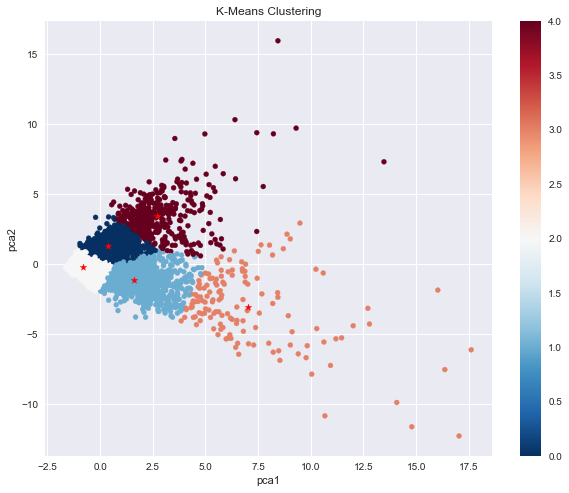

In [20]:
plt.figure(figsize=(10,8))

plt.title('K-Means Clustering')
plt.xlabel('pca1')
plt.ylabel('pca2')

scatter = plt.scatter(pca_df['pca1'], pca_df['pca2'], c=model_label, s=25, cmap='RdBu_r')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [21]:
pca_components = pd.DataFrame(pca.components_, columns=df.columns)
pca_components.head().T

,0,1
BALANCE,0.440082,0.425644
PURCHASES,0.450954,-0.389100
CASH_ADVANCE,0.191275,0.579674
PURCHASES_TRX,0.405120,-0.369077
CREDIT_LIMIT,0.463639,0.155722
MINIMUM_PAYMENTS,0.253272,0.253606
CC_APPROVAL,0.327491,-0.257434
P_AMOUNT_PER_TRX,0.126102,-0.200874


* Largest Values in pca1 = index CREDIT_LIMIT, PURCHASES, BALANCE, PURCHASES_TRX
      
* Largest Values in pca2 = index 2 (CASH_ADVANCE), 0 (BALANCE)  -- balance may be inflated due to borrowed money
* Smallest Values in pca2= index 1 (PURCHASES), 3 (PURCHASES_TRX)

## Write about results

Points far to the right are roughly correlated with higher credit limits, higher $ spent and higher balances... in other words these customers are likely wealthier and likely to be fairly reliable.

Points far to the top are roughly correlated with higher cash advances and high balances... the high balance may be an artifically inflated balance due to the cash advances made. These are customers who took large amounts of short term loans. 

In [83]:
scaled_df['GROUPS'] = model.labels_
scaled_df.head().T

,0,1,2,3,4
BALANCE,-0.732054,0.786858,0.447041,0.049015,-0.358849
PURCHASES,-0.424934,-0.469584,-0.107716,0.231995,-0.462095
CASH_ADVANCE,-0.466805,2.605438,-0.466805,-0.368678,-0.466805
PURCHASES_TRX,-0.511381,-0.591841,-0.109082,-0.551611,-0.551611
CREDIT_LIMIT,-0.960380,0.688601,0.826016,0.826016,-0.905414
MINIMUM_PAYMENTS,-0.297334,0.101998,-0.088524,-0.357057,-0.252265
CC_APPROVAL,-0.315041,-0.315041,3.174192,-0.315041,-0.315041
P_AMOUNT_PER_TRX,-0.163085,-0.460239,-0.058858,8.877985,-0.360565
GROUPS,2.000000,0.000000,1.000000,1.000000,2.000000


# Radar Plot

In [23]:
labels = np.array(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'CC_APPROVAL', 'P_AMOUNT_PER_TRX'])
stats=df.loc[:,'GROUPS'].values

In [24]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

In [84]:
X = scaled_df.groupby(['GROUPS']).mean().groupby(['BALANCE']).mean()
X = X.reset_index()
X


,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,CC_APPROVAL,P_AMOUNT_PER_TRX
0,-0.467875,-0.231998,-0.310746,-0.229170,-0.456615,-0.203451,-0.310741,-0.068936
1,0.168221,0.781554,-0.359602,0.914155,0.730446,-0.026400,1.463579,0.406367
2,0.747329,-0.294883,0.820398,-0.350432,0.422204,0.306127,-0.312483,-0.202620
3,1.931569,5.079788,-0.107756,4.375110,2.152365,0.960491,2.252038,1.057876
4,2.652778,-0.078401,2.646887,-0.121403,1.721445,1.482119,-0.177414,-0.051668


In [85]:
Group_1 = X.loc[0,:]
Group_2 = X.loc[1,:]
Group_3 = X.loc[2,:]
Group_4 = X.loc[3,:]
Group_5 = X.loc[4,:]

In [90]:
Group_1

BALANCE            -0.467875
PURCHASES          -0.231998
CASH_ADVANCE       -0.310746
PURCHASES_TRX      -0.229170
CREDIT_LIMIT       -0.456615
MINIMUM_PAYMENTS   -0.203451
CC_APPROVAL        -0.310741
P_AMOUNT_PER_TRX   -0.068936
Name: 0, dtype: float64

In [95]:
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

data = [go.Scatterpolar(
  r = [abs(Group_1[0]), abs(Group_1[1]), abs(Group_1[2]), abs(Group_1[3]),abs(Group_1[4]),abs(Group_1[5]),abs(Group_1[6]),abs(Group_1[7])],
  theta = labels,
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 1]
    )
  ),
  showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

## Logistic Regression Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [28]:
df.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_TRX,2.000000,0.000000,12.000000,1.000000,1.000000
CREDIT_LIMIT,1000.000000,7000.000000,7500.000000,7500.000000,1200.000000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.000000,244.791237
CC_APPROVAL,0.000000,0.000000,1.000000,0.000000,0.000000
P_AMOUNT_PER_TRX,47.700000,0.000000,64.430833,1499.000000,16.000000
GROUPS,2.000000,0.000000,1.000000,1.000000,2.000000


In [29]:
X = df.drop('CC_APPROVAL', axis=1)
y = df.CC_APPROVAL


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [30]:
loreg = LogisticRegression()
loreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

AUC: 0.98899553382312


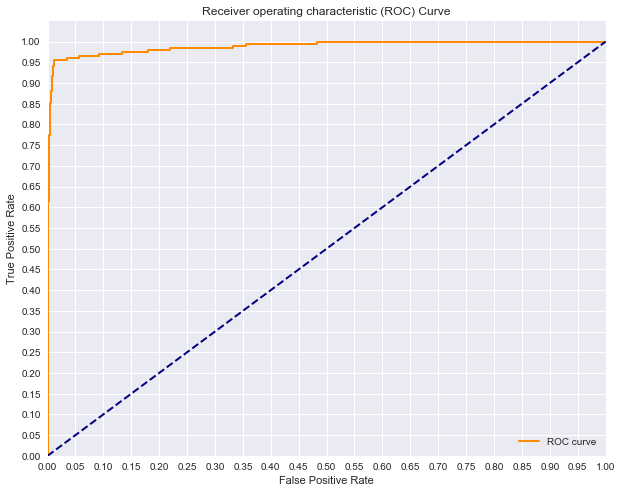

In [31]:
y_score = loreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree
Not useful for our classifier.

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc

In [33]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [34]:
#Calculate Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{0}".format(acc))

#Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

#Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Code here 

Accuracy is :100.0

AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,2035,0,2035
1,0,203,203
All,2035,203,2238


## KNN Classifier

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [36]:
df.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_TRX,2.000000,0.000000,12.000000,1.000000,1.000000
CREDIT_LIMIT,1000.000000,7000.000000,7500.000000,7500.000000,1200.000000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.000000,244.791237
CC_APPROVAL,0.000000,0.000000,1.000000,0.000000,0.000000
P_AMOUNT_PER_TRX,47.700000,0.000000,64.430833,1499.000000,16.000000
GROUPS,2.000000,0.000000,1.000000,1.000000,2.000000


In [37]:
X = df.drop('CC_APPROVAL', axis=1)
y = df.CC_APPROVAL

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.



,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,CC_APPROVAL,P_AMOUNT_PER_TRX,GROUPS
0,-0.732054,-0.424934,-0.466805,-0.511381,-0.960380,-0.297334,-0.315041,-0.163085,0.370859
1,0.786858,-0.469584,2.605438,-0.591841,0.688601,0.101998,-0.315041,-0.460239,-1.798300
2,0.447041,-0.107716,-0.466805,-0.109082,0.826016,-0.088524,3.174192,-0.058858,-0.713721
3,0.049015,0.231995,-0.368678,-0.551611,0.826016,-0.357057,-0.315041,8.877985,-0.713721
4,-0.358849,-0.462095,-0.466805,-0.551611,-0.905414,-0.252265,-0.315041,-0.360565,0.370859


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [41]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, preds)

Precision Score: 0.7927461139896373
Recall Score: 0.7806122448979592
Accuracy Score: 0.9629133154602324
F1 Score: 0.7866323907455013


**Precision** measures how precise our predictions are.     
*Precision = (True Positives / Pred Positives)*             

**Recall** tells us what percentage of the class(es) we're interested in were actually captured by the model.     
*Recall = (True Positives / Actual Total Positives)*     

**Accuracy** measures the total number of predictions our model got right, including both True Positives and True Negatives.     
*Accuracy = (True Pos + True Neg) / Total Observations*     

**F1-Score** represents the harmonic Mean of Precision and Recall. How well the model is doing overall.     
*F1-Score = 2*(Precision x Recall)/(Precision + Recall)

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
find_best_k(X_train, y_train, X_test, y_test)